# 0. 설정

In [23]:
import os
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers


import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_loss(history):
    plt.plot(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend(('loss', 'v_loss'))
    plt.show()

    
def plot_prediction(y_sample, y_pred):

    plt.figure(figsize=(15,3))
    plt.plot(y_sample, marker='o')
    plt.plot(y_pred, marker='o')
    plt.legend(('y true', 'y pred'))

# 8. 저장과 복원

## 8-1. 데이터 불러오기

In [5]:
housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
print('* Org data info : ', x_train.shape)
print( x_train[0])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print('\n* Transfored data info : ', x_train.shape)
print( x_train[0])

* Org data info :  (15480, 8)
[   4.2143       37.            5.28823529    0.97352941  860.
    2.52941176   33.81       -118.12      ]

* Transfored data info :  (15480, 8)
[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
 -0.8607415   0.73099911]


## 8-2. 모델 구성

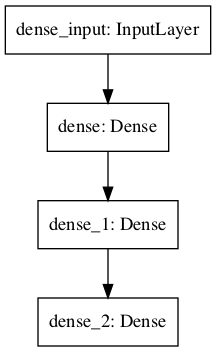

In [2]:
model = tf.keras.models.Sequential([
    layers.Dense(30, activation="relu", input_shape=[8]),
    layers.Dense(30, activation="relu"),
    layers.Dense(1)
])
plot_model(model)

## 8-3. 모델 컴파일

In [3]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 8-4. 모델 평가

## 8-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/10
12384/12384 [==============================] - 1s 41us/sample - loss: 1.9380 - val_loss: 0.9721
Epoch 2/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.8412 - val_loss: 0.7904
Epoch 3/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.7362 - val_loss: 0.7171
Epoch 4/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6745 - val_loss: 0.6665
Epoch 5/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6263 - val_loss: 0.6282
Epoch 6/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5898 - val_loss: 0.5979
Epoch 7/10
12384/12384 [==============================] - 0s 27us/sample - loss: 0.5620 - val_loss: 0.5746
Epoch 8/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5404 - val_loss: 0.5553
Epoch 9/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5230 - val_l

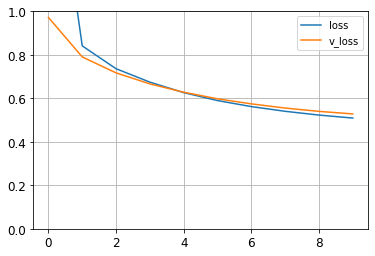

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
plot_loss(history)

## 8-6. 모델 저장

In [7]:
model.save("my_keras_model.h5")

## 8-7. 모델 불러오기

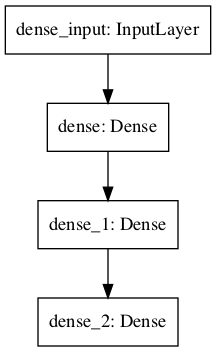

In [9]:
loaded_model = tf.keras.models.load_model("my_keras_model.h5")
plot_model(loaded_model)

## 8-8. 불러온 모델 평가

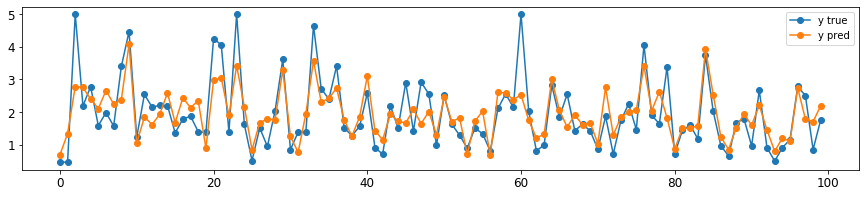

In [11]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = loaded_model.predict(x_sample)
plot_prediction(y_sample, y_pred)

# 9. 훈련 과정에서 콜백 사용하기

## 9-1. 콜백 선언하기

In [17]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ckp_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

## 9-2. 모델 학습하기

Train on 12384 samples, validate on 3096 samples
Epoch 1/5
12384/12384 [==============================] - 0s 29us/sample - loss: 0.3847 - val_loss: 0.4199
Epoch 2/5
12384/12384 [==============================] - 0s 29us/sample - loss: 0.3837 - val_loss: 0.4180
Epoch 3/5
12384/12384 [==============================] - 0s 30us/sample - loss: 0.3821 - val_loss: 0.4166
Epoch 4/5
12384/12384 [==============================] - 0s 29us/sample - loss: 0.3814 - val_loss: 0.4166
Epoch 5/5
12384/12384 [==============================] - 0s 29us/sample - loss: 0.3802 - val_loss: 0.4151


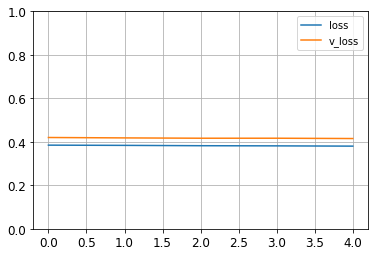

In [19]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])
plot_loss(history)

## 9-3. 콜백으로 저장된 모델 불러오기

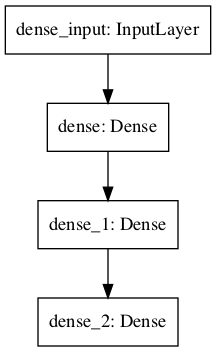

In [20]:
ckp_model = tf.keras.models.load_model("ckp_model.h5")
plot_model(ckp_model)

## 9-4. 불러온 모델 평가하기

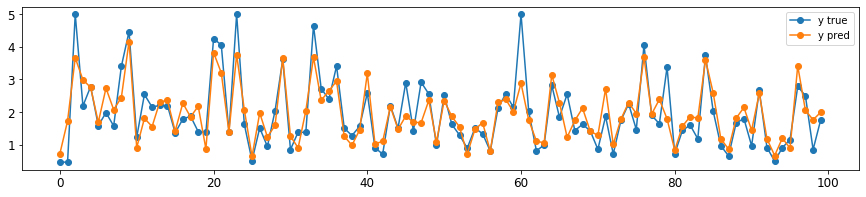

In [21]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = ckp_model.predict(x_sample)

plot_prediction(y_sample, y_pred)

# 10. 텐서보드

## 10-1. 모델 구성

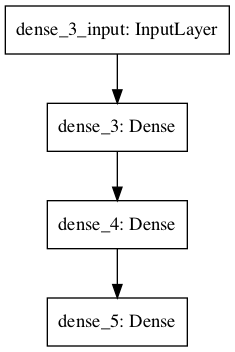

In [26]:
model = tf.keras.models.Sequential([
    layers.Dense(30, activation="relu", input_shape=[8]),
    layers.Dense(30, activation="relu"),
    layers.Dense(1)
])
plot_model(model)

## 10-2. 모델 컴파일

In [47]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 10-3. 콜백선언

In [48]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("logs/ckp_model.h5", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard('logs')

## 10-4. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/5
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4016 - val_loss: 0.4339
Epoch 2/5
12384/12384 [==============================] - 0s 33us/sample - loss: 0.4004 - val_loss: 0.4334
Epoch 3/5
12384/12384 [==============================] - 0s 35us/sample - loss: 0.3993 - val_loss: 0.4320
Epoch 4/5
12384/12384 [==============================] - 0s 34us/sample - loss: 0.3982 - val_loss: 0.4307
Epoch 5/5
12384/12384 [==============================] - 0s 34us/sample - loss: 0.3968 - val_loss: 0.4306


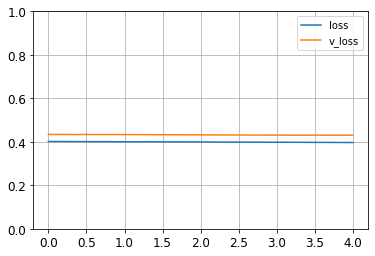

In [50]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, tensorboard_cb])
plot_loss(history)

## 10-5. 텐서보드 실행


* 텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:
> tensorboard --logdir=./logs --port=6006

